In [127]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [93]:
def get_data():
    """Unpack data"""
    stock = pd.read_csv("data/stock_data.csv")[["date", "ticker", "open" , "high", "low", "close"]]
    stock["date"] = pd.to_datetime(stock["date"])
    tickets = pd.read_csv("data/ticker_info.csv", index_col= 0)
    return stock, tickets

    

In [157]:
def calculate_mfm(data):
    data["mfm"] = ((data["close"] - data["low"]) - (data["high"] - data["close"]))*100/(data["high"] - data["low"])
    data.loc[data["mfm"].isna(), "mfm"] = 0.0
    return data

def calc_strategy(stock, low = -90.0, high = 90.0):
    stock["signal"] = np.nan
    stock_numpy = stock.to_numpy()
    for index in range(2, len(stock)):
        if (stock_numpy[index, 6] <= low) & (stock_numpy[index - 1, 6] > low) & (stock_numpy[index - 2, 6] > low):
            stock_numpy[index, 7] = "buy"
        elif (stock_numpy[index, 6] >= high) & (stock_numpy[index - 1, 6] < high) & (stock_numpy[index - 2, 6] < high):
            stock_numpy[index, 7] = "sell"
    return pd.DataFrame(stock_numpy, columns = stock.columns)


        

In [148]:
stock, tickets = get_data()

In [149]:
single_comp = stock[stock["ticker"]=="sh603127"]

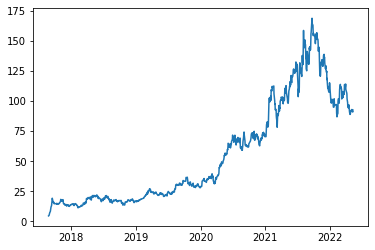

In [150]:
plt.plot(single_comp.date, single_comp.low)

In [151]:
stock_with_mfm = calculate_mfm(single_comp)

/var/folders/33/pml9j82x2hz0y5wjjt4ws6sm0000gn/T/ipykernel_28899/681483314.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data["mfm"] = ((data["close"] - data["low"]) - (data["high"] - data["close"]))*100/(data["high"] - data["low"])


In [158]:
stock_with_signals = calc_strategy(stock_with_mfm)

/var/folders/33/pml9j82x2hz0y5wjjt4ws6sm0000gn/T/ipykernel_28899/2670496194.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  stock["signal"] = np.nan


In [159]:
stock_with_signals.head()

,date,ticker,open,high,low,close,mfm,signal
0,2017-08-25,sh603127,4.63,4.63,4.63,4.63,0.0,NaN
1,2017-08-28,sh603127,5.09,5.09,5.09,5.09,0.0,NaN
2,2017-08-29,sh603127,5.6,5.6,5.6,5.6,0.0,NaN
3,2017-08-30,sh603127,6.16,6.16,6.16,6.16,0.0,NaN
4,2017-08-31,sh603127,6.78,6.78,6.78,6.78,0.0,NaN


In [160]:
stock_with_signals.signal.value_counts()

sell    61
buy     39
Name: signal, dtype: int64